# 클래스

In [1]:
import torch
import torchvision
from torchvision import tv_tensors

In [2]:
classes=['c_1','c_2_01','c_2_02','c_3',
         'c_4_01_02','c_4_02_01_02',
         'c_4_02_02_02','c_4_02_03_02','c_4_03','c_5_02',
         'c_6','c_7','c_1_01','c_2_02_01',
         'c_3_01','c_4_03_01','c_5_01_01',
         'c_5_02_01','c_6_01','c_7_01',
         'c_4_01_01','c_4_02_01_01',
         'c_4_02_02_01','c_4_02_03_01',
         'c_5_01','c_8_01','c_8_02',
         'c_8_01_01','c_9']

# CustomDataset 구성하기

annopath, image_path, annofile, imagefile

## CUSTOM Transform

## v2.transforms

In [3]:
from torchvision.transforms import v2
train_transforms = v2.Compose([
    v2.RandomHorizontalFlip(p=0.5),
    v2.Resize((224,224)),
    v2.RandomVerticalFlip(0.5)
])

test_transform = v2.Compose([
    v2.Resize((224,224))
])

In [4]:
from torch.utils.data import Dataset
from torchvision.io import read_image
from pathlib import Path
from torchvision.utils import draw_bounding_boxes
from json import load
import torch
import matplotlib.pyplot as plt

# TrashDataset에서 불러와야할 것들
'''전처리한 화상의 텐서 형식 데이터와 어노테이션 획득'''
'''전터리한 화상의 텐서 형식 데이터, 어노테이션, 화상의 높이, 폭 취득'''
anno_path = Path(r'C:\Users\hyssk\Myopencv\DeepLearningVision\CustomDataset\Data\02.라벨링데이터\\')
img_dir = Path(r'C:\Users\hyssk\Myopencv\DeepLearningVision\CustomDataset\Data\01.원천데이터\\')

# Trash Dataset에서 뭘 뽑아내야할까
# Image의 [3 channels, width, height] 에 대한 정보, 해당 이미지의 Annotation 정보 (class 정보, BBOX)
class TrashDataset(Dataset):
    def __init__(self, classes, anno_path, img_dir, transform = None):
        self.anno_list = sorted(list(anno_path.glob('*/*/*.json'))) # annotation 파일들 모으고 sorted로 정렬
        self.img_list = sorted(list(img_dir.glob('*/*/*.jpg'))) # image 파일들을 모으고 sorted로 정렬
        self.transform= transform
        self.classes = classes

    def __getitem__(self, idx):
        # img 읽어오기
        img = read_image(str(self.img_list[idx]))

        # img와 맞는 annotation_path
        annotation_path = self.anno_list[idx]

        #  ret : [[xmin,ymin,xmax,ymax,label_ind],...]
        ret=[]
        with open(annotation_path, 'r') as f:
            data = load(f)
            for object in data['objects']:
                bndbox=[]
                for coord in object["annotation"]['coord']: # [X,Y,Width,Height] -> [X,Y,Xmax,Ymax] 변환
                    if coord == 'x':
                        bndbox.append(int(object['annotation']['coord'][coord])) # / float(data['Info']['RESOLUTION'].split('/')[0]))
                    elif coord =='y':
                        bndbox.append(int(object['annotation']['coord'][coord])) # / float(data['Info']['RESOLUTION'].split('/')[1]))
                    elif coord == 'width':
                        bndbox.append(int(object['annotation']['coord']['x'] + object['annotation']['coord'][coord])) # / float(data['Info']['RESOLUTION'].split('/')[0]))
                    elif coord == 'height':
                        bndbox.append(int(object['annotation']['coord']['y'] + object['annotation']['coord'][coord])) # / float(data['Info']['RESOLUTION'].split('/')[1]))
                bndbox.append(classes.index(object['class_name']))
        # [3 channels, width, height], [[Xmin,Ymin,Xmax,Ymax,label_idx],....] // shape [N,5]
                width,height = data['Info']['RESOLUTION'].split('/')
                ret.append(bndbox)
        coord = [row[:-1] for row in ret]
        boxes = tv_tensors.BoundingBoxes(coord,format="XYXY",canvas_size=(int(height),int(width)))
        transformed_img, transformed_boxes = self.transform(torch.tensor(img),boxes)
        class_idx = [row[-1] for row in ret]
        return transformed_img, transformed_boxes, class_idx
    def __len__(self):
        return len(self.anno_list)


dataset = TrashDataset(classes,anno_path,img_dir,train_transforms)
img, boxes, class_idx = dataset[1]
dataset[1]

C:\Users\hyssk\AppData\Local\Temp\ipykernel_53864\3849383227.py:52: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  transformed_img, transformed_boxes = self.transform(torch.tensor(img),boxes)
c:\Users\hyssk\anaconda3\envs\objectdetection\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models

(tensor([[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],
 
         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],
 
         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8),
 BoundingBoxes([[149,   0, 183, 108],
                [126,   0, 149,  28],
                [119,  12, 155, 112],
                [ 63,   0, 113,  57],
                [ 86,  53, 108, 101],
                [ 44,  50,  71,  87],
                [ 75,  93, 110, 149],
             

# Dataset[idx] 시각화해보기

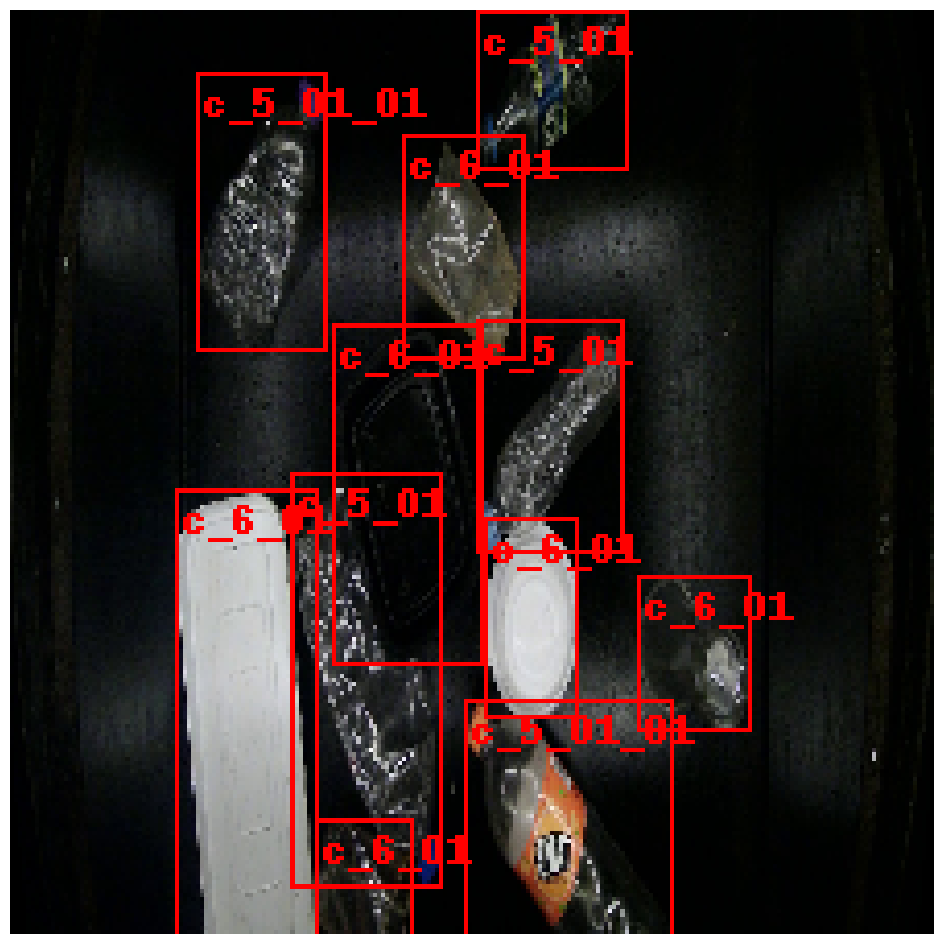

In [5]:
drawn_box = draw_bounding_boxes(img, boxes, labels=[classes[i] for i in class_idx], colors=(255,0,0))
plt.figure(figsize=(12,12))
plt.imshow(drawn_box.permute(1,2,0))
plt.axis(False)
plt.show()

# 데이터 로더 (Batch_size)

나의 데이터셋은 length가 다양하므로 dataloader시 batch로 묶어줄때 오류가 난다. 그래서 Collate_fn이 필요

In [6]:
def od_collate_fn(batch):
    '''
    Dataset에서 꺼내는 어노테이션 데이터의 크기는 화상마다 다름.
    화상 내의 물체 수가 두개이면 (2,5) 사이즈 [xmin, ymin, xmax, ymax, label]이 2개, 
    물체 수가 3개 이면 (3,5) 사이즈 [Xmin, Xmax, ymin, ymax, label]가 3개
    변화에 대응하는 DataLoader를 만드는 collate_fn을 작성
    collate_fn은 파이토치 리스트로 mini_batch를 작성하는 함수이다.
    '''
    targets=[]
    labels=[]
    imgs=[]
    for sample in batch:
        imgs.append(sample[0]) # sample[0]은 화상 이미지
        targets.append(torch.Tensor(sample[1])) # sample[1]은 어노테이션 gt
        labels.append(torch.Tensor(sample[2]))
    
    # imgs는 미니 배치 크기의 리스트
    imgs=torch.stack(imgs,dim=0)

    # targets은 어노테이션의 정단인 gt리스트
    # 리스트 크기 = 미니 배치 크기
    # targets 리스트의 요소는 [n,5]
    # n은 화상 속 물체의 개수
    # 5는 [xmin, ymin, xmax, ymax, label]
    return imgs, targets, labels

In [7]:
from torch.utils.data import DataLoader
dataloader = DataLoader(dataset,2,True,collate_fn=od_collate_fn)
images, targets ,labels = next(iter(dataloader))
images.shape, len(targets[0]),len(targets[1]), labels,len(labels[0]),len(labels[1])

C:\Users\hyssk\AppData\Local\Temp\ipykernel_53864\3849383227.py:52: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  transformed_img, transformed_boxes = self.transform(torch.tensor(img),boxes)


(torch.Size([2, 3, 224, 224]),
 8,
 7,
 [tensor([18., 10., 24., 26., 16., 18., 24., 18.]),
  tensor([16., 18.,  2., 11., 10., 11., 10.])],
 8,
 7)

In [9]:
print(labels)

[tensor([18., 10., 24., 26., 16., 18., 24., 18.]), tensor([16., 18.,  2., 11., 10., 11., 10.])]
